# Network partitioning - synthetic data
---

## Imports
---

In [57]:
import networkx as nx
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import math
#from itertools import groupby
#from operator import itemgetter
import osmnx as ox
import geopandas as gpd 

%matplotlib inline

## Data
---

In [58]:
polygon1 = gpd.read_file("shp_files/polygons/polygon1.shp")
polygon2 = gpd.read_file("shp_files/polygons/polygon2.shp")

In [69]:
gdf = gpd.pd.concat([polygon1, polygon2])

In [70]:
#ofer_network = nx.read_shp("shp_files/StreetNetwork/", geom_attrs=True)

In [71]:
ofer_network = gpd.read_file("shp_files/StreetNetwork")

In [72]:
print(ofer_network.crs)     

None


In [73]:
print(gdf.crs)   

epsg:2039


In [74]:
ofer_network = ofer_network.set_crs('epsg:2039')

In [76]:
print(ofer_network.crs)    

epsg:2039


In [77]:
print(gdf.crs)   

epsg:2039


In [78]:
gdf

,id,Age_Mean,Age_Median,Population,Shared_dwe,Unshared_d,Unshared_W,Unshared_F,One_person,One_family,...,one_car,two_cars,three_cars,four_plus_,Owned_tenu,Social_ren,Private_re,Males,Females,geometry
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((179242.658 663030.556, 179053.497 66..."
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((177925.053 662539.716, 177822.319 66..."


In [129]:
ofer_network[0:3]

,u,v,length,geometry
0,1,2,91.415350,"LINESTRING (178471.079 663105.366, 178483.416 ..."
1,1,14,0.079047,"LINESTRING (178471.079 663105.366, 178471.060 ..."
2,2,3,97.893332,"LINESTRING (178483.416 663014.787, 178496.071 ..."


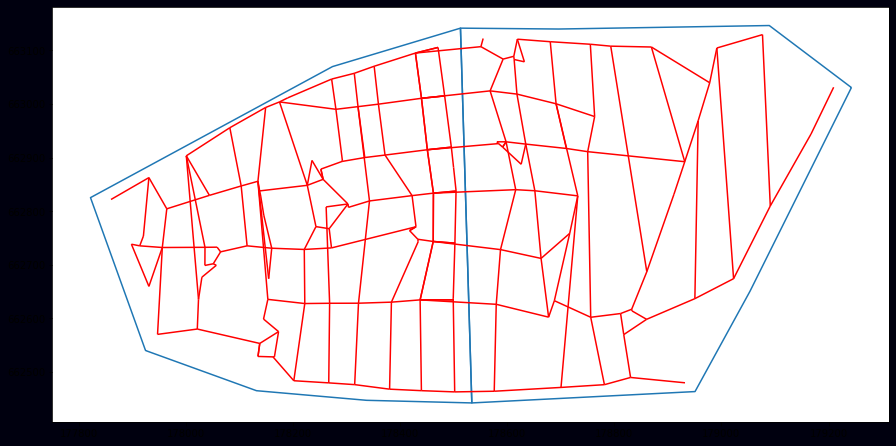

In [121]:
fig, ax = plt.subplots(figsize=(15, 15))
#ax.set_aspect('equal')

gdf.boundary.plot(ax=ax)
ofer_network.plot(ax=ax, color = 'red')

fig.set_facecolor("#00000F")
plt.show()

In [123]:
clipped1 = ofer_network.clip(polygon1)
clipped2 = ofer_network.clip(polygon2)

In [126]:
clipped1 = clipped1[~clipped1.is_empty]    
clipped2 = clipped2[~clipped2.is_empty]      

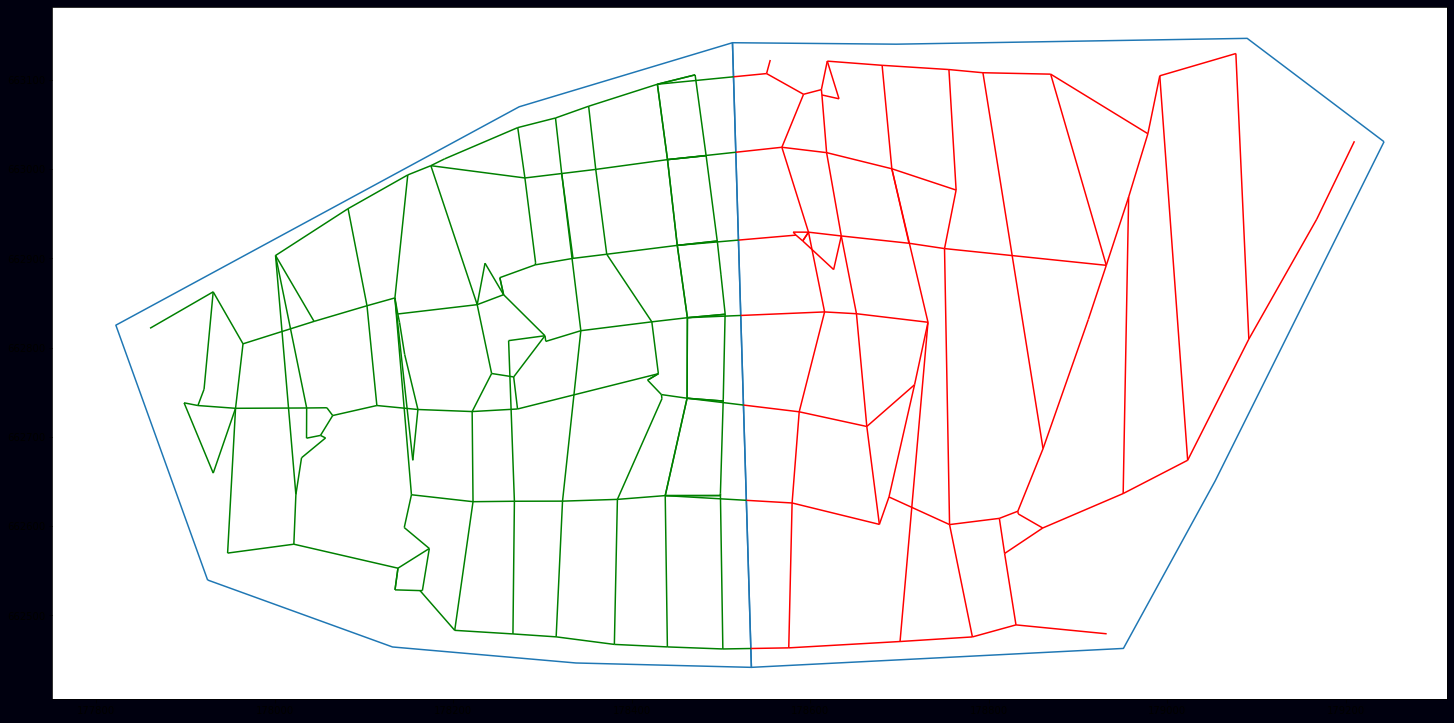

In [127]:
fig, ax = plt.subplots(figsize=(25, 25))
#ax.set_aspect('equal')

gdf.boundary.plot(ax=ax)
clipped1.plot(ax=ax, color = 'red')
clipped2.plot(ax=ax, color = 'green')

fig.set_facecolor("#00000F")
plt.show()

In [133]:
clipped1.to_file("clipped/clipped1.shp")
clipped2.to_file("clipped/clipped2.shp")

In [134]:
net1 = nx.read_shp('clipped/clipped1.shp') 
net2 = nx.read_shp('clipped/clipped2.shp') 

In [139]:
pos = [i for i in net1]
locations = dict(zip(list(net1.nodes()), pos))
nx.set_node_attributes(net1, locations, 'pos')

In [141]:
pos = [i for i in net2]
locations = dict(zip(list(net2.nodes()), pos))
nx.set_node_attributes(net2, locations, 'pos')

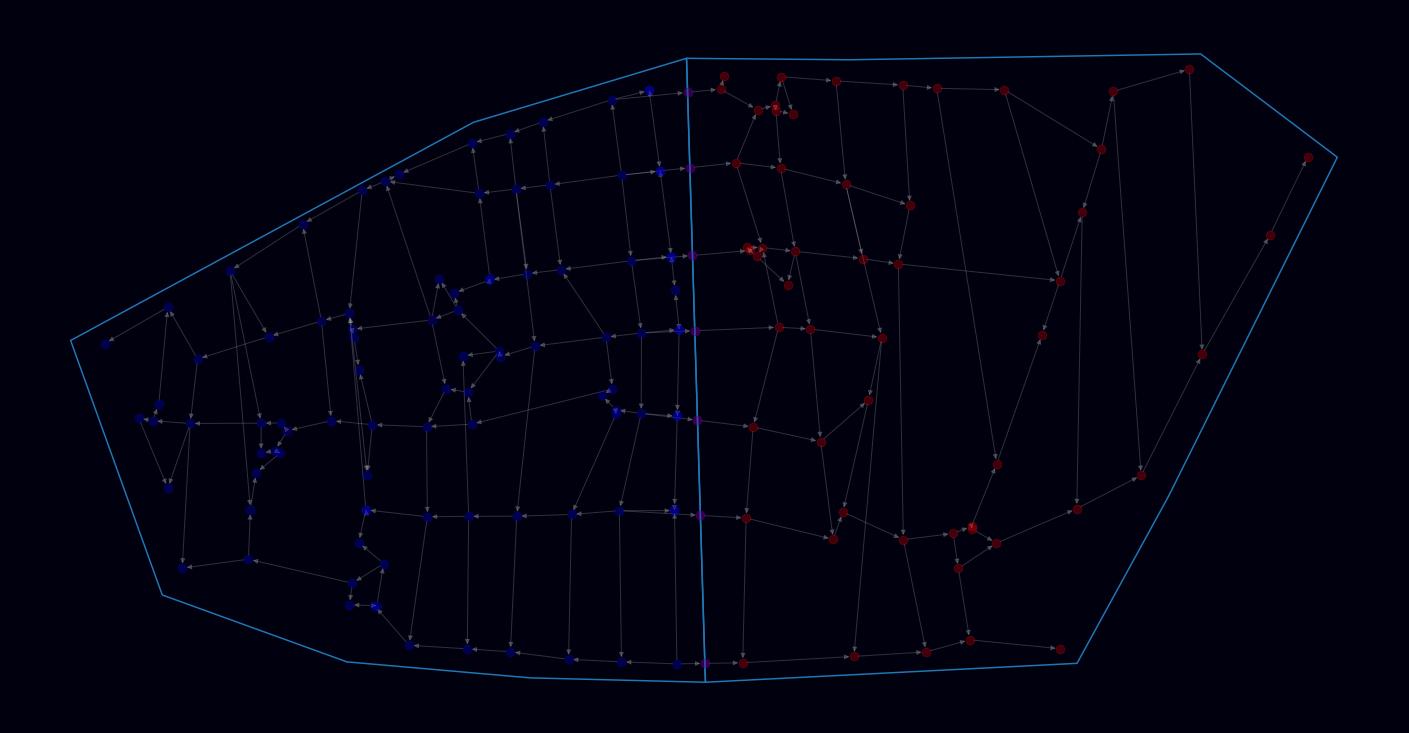

In [150]:
fig, ax = plt.subplots(figsize=(25, 25))
#ax.set_aspect('equal')

gdf.boundary.plot(ax=ax)
pos1 = nx.get_node_attributes(net1,'pos')
nx.draw(net1, pos1, node_size=75, node_color='red', edge_color='silver', alpha = 0.25)
pos2 = nx.get_node_attributes(net2,'pos')
nx.draw(net2, pos2, node_size=75, node_color='blue', edge_color='silver', alpha = 0.25)

fig.set_facecolor("#00000F")
plt.show()

In [154]:
nx.adjacency_matrix(net1).to_dense()

AttributeError: to_dense not found

In [ ]:
i = 0
for index, polygon in gdf.iterrows():
    intersecting_nodes = nodes[nodes.intersects(polygon['geometry'])].index
    G_sub = G.subgraph(intersecting_nodes)
    key = polygon['lsoa11nm']
    if len(G_sub) > 0:
        subgraphs[key] = G_sub
        #fig, ax = ox.plot_graph(G_sub)
    else:
        subgraphs[key] = nx.adjacency_matrix(subgraphs[key]).todense()